%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install tensorflow

In [129]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('modified7525_card_transdata.csv')

fraud_count = df[df['fraud'] != 0].shape[0]
print(f"Fraud Count {fraud_count}")

df.tail()

Fraud Count 87403


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
349606,5.174346,0.091449,0.271987,1,1,0,1,0
349607,7.367244,0.160306,0.086809,1,1,0,1,0
349608,59.863047,0.312631,1.000054,1,0,0,1,0
349609,6.170266,0.073397,0.449757,1,0,0,1,0
349610,8.240822,3.783735,0.453087,1,0,0,1,0


In [130]:
length_before = df.shape[0]
print(f"Length before: {length_before}")

## drop duplicates
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

length_after = df.shape[0]

print(f"Length after {length_after}")

Length before: 349611
Duplicated values dropped succesfully
Length after 349611


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(["fraud"], axis=1)
y = df["fraud"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [132]:
# len(X_val) + len(X_train) + len(X_test)

In [133]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# model = Sequential()
# model.add(Dense(128, activation='relu', input_dim=7))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation="sigmoid"))

# model.summary()

In [134]:
from keras.optimizers import Adam

# model.compile(optimizer=Adam(learning_rate=0.0001), 
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])

# # train the model
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# acc = history.history["accuracy"]
# val = history.history["val_accuracy"]
# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, '-', label='Training accuracy')
# plt.plot(epochs, val, ':', label='Validation accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.plot()

In [136]:
from sklearn.metrics import confusion_matrix
 
# y_predicted = model.predict(X_test) > 0.5
# mat = confusion_matrix(y_test, y_predicted)
# labels = ['Legitimate', 'Fraudulent']
 
# sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
#             xticklabels=labels, yticklabels=labels)
 
# plt.xlabel('Predicted label')
# plt.ylabel('Actual label')

In [137]:
# true_legitimate = 0
# true_fraudulent = 0
# false_legitimate = 0
# false_fraudulent = 0

# for i in range(0, len(y_predicted)):
#     if y_predicted[i] and y_test.iloc[i]:
#         true_fraudulent+=1
#     elif y_predicted[i] and (not y_test.iloc[i]):
#         false_fraudulent+=1
#     elif (not y_predicted[i]) and y_test.iloc[i]:
#         false_legitimate+=1
#     elif (not y_predicted[i]) and (not y_test.iloc[i]):
#         true_legitimate+=1
        

# true_legitimate

In [138]:
# print('true legitimate: ' + str(true_legitimate))
# print('true fraudulent: ' + str(true_fraudulent))
# print('false legitimate: ' + str(false_legitimate))
# print('false fraudulent: ' + str(false_fraudulent))

In [139]:
# test_acc = (true_legitimate + true_fraudulent)/len(y_test)
# print(test_acc)

# Random Forest Classifer Model

## Train a Random Forest Classifier Model

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train a Logistic Regression classifier
forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

### Test model against test dataset

In [141]:
y_train_pred = forest_classifier.score(X_test, y_test)

print(y_train_pred)

0.9999618626291903


Text(113.9222222222222, 0.5, 'Actual label')

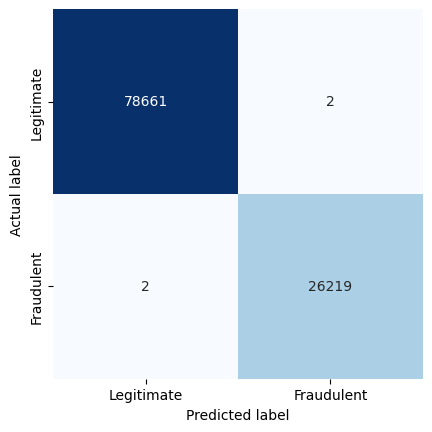

In [142]:
from sklearn.metrics import confusion_matrix
 
y_predicted = forest_classifier.predict(X_test)
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

### Test against entire dataset

In [143]:
# Read the data from the CSV file
df = pd.read_csv('card_transdata.csv')

fraud_count = df[df['fraud'] != 0].shape[0]
print(f"Fraud Count {fraud_count}")

length_before = df.shape[0]
print(f"Length {length_before}")

df.tail()

Fraud Count 87403
Length 1000000


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [144]:
## drop duplicates

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

length_after = df.shape[0]

print(f"The length before {length_before} length after {length_after}")

Duplicated values dropped succesfully
The length before 1000000 length after 1000000


In [145]:
X = df.drop(["fraud"], axis=1)
Y = df["fraud"]

X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [146]:
#normalize
scaler = StandardScaler()
X = scaler.fit_transform(X) # should this be fit_transform()???

X

array([[ 0.47788202, -0.18284892,  0.04349141, ...,  1.36157608,
        -0.33445812, -1.36442519],
       [-0.24160679, -0.18809398, -0.18930045, ..., -0.73444298,
        -0.33445812, -1.36442519],
       [-0.3293694 , -0.16373307, -0.49881185, ..., -0.73444298,
        -0.33445812,  0.73290937],
       ...,
       [-0.36264968, -0.13790278, -0.57369398, ...,  1.36157608,
        -0.33445812,  0.73290937],
       [-0.34209827, -0.1855234 , -0.48162807, ..., -0.73444298,
        -0.33445812,  0.73290937],
       [ 0.48140344, -0.18257921, -0.51338354, ...,  1.36157608,
        -0.33445812,  0.73290937]])

Text(113.9222222222222, 0.5, 'Actual label')

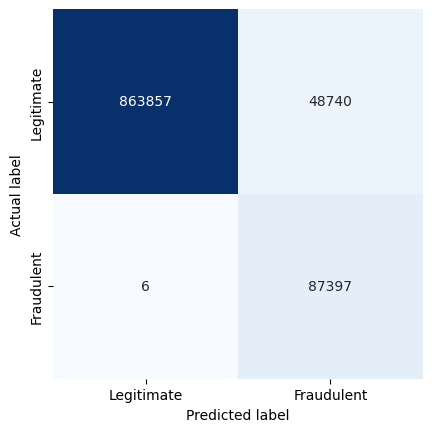

In [147]:
from sklearn.metrics import confusion_matrix
 
y_predicted = forest_classifier.predict(X)
mat = confusion_matrix(Y, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')


In [148]:
true_legitimate = 0
true_fraudulent = 0
false_legitimate = 0
false_fraudulent = 0

for i in range(0, len(y_predicted)):
    if y_predicted[i] and Y.iloc[i]:
        true_fraudulent+=1
    elif y_predicted[i] and (not Y.iloc[i]):
        false_fraudulent+=1
    elif (not y_predicted[i]) and Y.iloc[i]:
        false_legitimate+=1
    elif (not y_predicted[i]) and (not Y.iloc[i]):
        true_legitimate+=1
        

true_legitimate

863857

In [149]:
print('true legitimate: ' + str(true_legitimate))
print('true fraudulent: ' + str(true_fraudulent))
print('false legitimate: ' + str(false_legitimate))
print('false fraudulent: ' + str(false_fraudulent))

true legitimate: 863857
true fraudulent: 87397
false legitimate: 6
false fraudulent: 48740


In [150]:
test_acc = (true_legitimate + true_fraudulent)/len(Y)
print(test_acc)

0.951254
